In [2]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

# Load the cleaned dataset
file_path = '/content/drive/MyDrive/DataSet/cleaned_DataScientist.csv'
df = pd.read_csv(file_path)


Mounted at /content/drive


In [7]:
# Step 1:Create the job_level column

def classify_job_level(title):
    title = str(title).lower()

    if any(keyword in title for keyword in ['senior', 'lead', 'principal', 'director']):
        return 'Senior'
    elif any(keyword in title for keyword in ['junior', 'entry', 'intern', 'graduate']):
        return 'Entry'
    elif any(keyword in title for keyword in ['manager', 'consultant', 'specialist', 'mid']):
        return 'Mid'
    elif 'data scientist' in title or 'data analyst' in title or 'ml engineer' in title:
        return 'Mid'
    else:
        return 'Unspecified'

df['Job Level'] = df['Job Title'].apply(classify_job_level)
df[['Job Title', 'Job Level']].head(10)

,Job Title,Job Level
0,senior data scientist,Senior
1,"data scientist, product analytics",Mid
2,data science manager,Mid
3,data analyst,Mid
4,"director, data science",Senior
5,data scientist,Mid
6,data scientist,Mid
7,data scientist/machine learning,Mid
8,"data scientist, acorn ai labs",Mid
9,data scientist,Mid


In [8]:
# Step 2: Count Skills per Job Level

from collections import Counter
import re

# Define your skills vocabulary
technical_skills = [
    'python', 'sql', 'excel', 'tableau', 'powerbi', 'spark',
    'pandas', 'numpy', 'matplotlib', 'seaborn',
    'hadoop', 'aws', 'azure', 'gcp', 'docker',
    'tensorflow', 'keras', 'pytorch', 'scikit', 'machine', 'learning',
    'nlp', 'data', 'analysis', 'analytics', 'modeling', 'statistics'
]

# Clean and tokenize job descriptions, extracting skills
def clean_and_tokenize(text):
    text = str(text).lower()
    text = re.sub(r'https?:\/\/\S+|www\.\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    return [word for word in tokens if word in technical_skills]

# Skill frequency by job level
level_skill_counts = {}

for level in ['Entry', 'Mid', 'Senior']:
    subset = df[df['job_level'] == level]['Job Description']
    all_tokens = []

    for desc in subset:
        all_tokens.extend(clean_and_tokenize(desc))

    level_skill_counts[level] = Counter(all_tokens)

In [9]:
# Step 3: Create Comparison Table

import pandas as pd

# Create DataFrame from skill counters
comparison_df = pd.DataFrame(level_skill_counts).fillna(0).astype(int)

# Get top 10 most frequent skills across all levels
top_skills = comparison_df.sum(axis=1).sort_values(ascending=False).head(10).index
top_comparison_df = comparison_df.loc[top_skills]

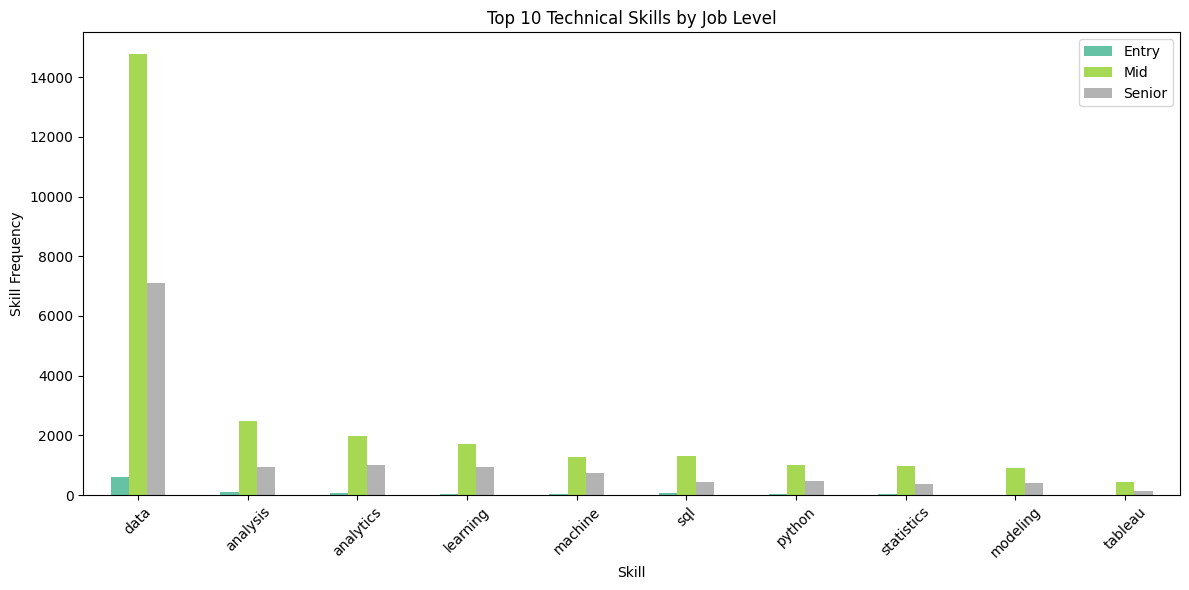

In [10]:
# Step 4: Visualize Skill Trends

import matplotlib.pyplot as plt

# Bar chart of skill frequency across job levels
top_comparison_df.plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title('Top 10 Technical Skills by Job Level')
plt.ylabel('Skill Frequency')
plt.xlabel('Skill')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##  Day 7: Skill Trends Across Job Levels

**Dataset Used:** `cleaned_DataScientist.csv`

---

###  Objective:
To analyze and compare technical skill requirements across different job experience levels (Entry, Mid, Senior) based on job descriptions.

---

###  Steps Performed:

1. **Classified Job Levels**
   - Used keyword matching on the `Job Title` column
   - Assigned levels as `Entry`, `Mid`, or `Senior` based on role keywords like "junior", "senior", "manager", etc.
   - Added new column: `job_level`

2. **Defined Technical Skill List**
   - Included tools and concepts like: `python`, `sql`, `tableau`, `machine`, `learning`, `aws`, etc.

3. **Extracted Skills from Descriptions**
   - Cleaned and tokenized `Job Description` text
   - Removed URLs, special characters, and converted text to lowercase
   - Matched tokens with the technical skill list

4. **Grouped by Job Level**
   - Aggregated skill frequencies separately for each job level
   - Selected top 10 most common skills across all levels

5. **Visualized Results**
   - Created a **grouped bar chart** comparing skill frequency for `Entry`, `Mid`, and `Senior` roles

---

###  Key Findings:
- **Mid-level roles** mention the most technical skills, reflecting their volume in the dataset
- Top skills across all levels: `data`, `analysis`, `learning`, `machine`, `sql`, `python`
- **Senior roles** emphasize strategic skills like `modeling` and `statistics`
- **Entry-level roles** are less frequent and show fewer skill mentions overall

---